In [0]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd

In [0]:
mnist= fetch_openml('mnist_784')
x,y=mnist['data'],mnist['target']

In [0]:
Z=(np.concatenate((x,y.reshape((len(y),1))),axis=1))

In [0]:
data=[]
for i in range(len(Z)):
  if Z[i,-1]=='1' or Z[i,-1]=='7':
    data.append(Z[i,:])

data=np.asarray(data).reshape((len(data),785))
np.random.shuffle(data)

In [0]:
sevens=[]
ones=[]
for i in range(len(data)):
  if data[i,-1]=='7':
    sevens.append(data[i,:])
  else:
    ones.append(data[i,:])

In [0]:
sevens=np.asarray(sevens).reshape((len(sevens),785))
ones=np.asarray(ones).reshape((len(ones),785))


In [0]:
train_1=np.concatenate((ones[0:6000,:],sevens[0:500,:]),axis=0)
train_1=train_1.astype(int)
np.random.shuffle(train_1)

train_2=np.concatenate((ones[0:6000,:],sevens[500:1000,:]),axis=0)
train_2=train_2.astype(int)
np.random.shuffle(train_2)

train_3=np.concatenate((ones[0:6000,:],sevens[1000:1500,:]),axis=0)
train_3=train_3.astype(int)
np.random.shuffle(train_3)

In [0]:
test=np.concatenate((ones[6000:,:],sevens[6000:,:]),axis=0)
np.random.shuffle(test)

In [10]:
#Learning Model
from sklearn import svm,metrics

clf1 = svm.SVC(kernel='linear',probability=True) # Linear Kernel
#Train the model using the training sets
clf1.fit(train_1[:,0:-1]/255.0,train_1[:,-1])

#Predict the response for test dataset
y_pred1 = clf1.predict(test[:,0:-1]/255.0)
cm_1=metrics.confusion_matrix(test[:,-1].astype(int),y_pred1)
cm_1

array([[1877,    0],
       [  35, 1258]])

In [11]:
clf2 = svm.SVC(kernel='linear',probability=True) # Linear Kernel
#Train the model using the training sets
clf2.fit(train_2[:,0:-1]/255.0,train_2[:,-1])

#Predict the response for test dataset
y_pred2 = clf2.predict(test[:,0:-1]/255.0)

cm_2=metrics.confusion_matrix(test[:,-1].astype(int),y_pred2)
cm_2

array([[1876,    1],
       [  38, 1255]])

In [12]:
clf3 = svm.SVC(kernel='linear',probability=True) # Linear Kernel
#Train the model using the training sets
clf3.fit(train_3[:,0:-1]/255.0,train_3[:,-1])

#Predict the response for test dataset
y_pred3 = clf3.predict(test[:,0:-1]/255.0)
cm_3=metrics.confusion_matrix(test[:,-1].astype(int),y_pred3)
cm_3

array([[1877,    0],
       [  30, 1263]])

#Accuracy and Deviation

In [13]:
#TESTING PERFORMANCE
#MEAN ACCURACY +- STANDARD DEVIATION
#SVM
def accuracy_deviation(confusion_mat):
  mean_accuracy=(confusion_mat[0,0]+confusion_mat[1,1])/(confusion_mat[0,0]+confusion_mat[0,1]+confusion_mat[1,0]+confusion_mat[1,1])
  v=np.round(mean_accuracy*100,2)
  return(v)

conf_mat_1=accuracy_deviation(cm_1)
conf_mat_2=accuracy_deviation(cm_2)
conf_mat_3=accuracy_deviation(cm_3)
mean=(conf_mat_1+conf_mat_2+conf_mat_3)/3

print('====================================================================================================')
print('\t\t Accuracy and Deviation for Training Data 1=',conf_mat_1,'+',conf_mat_1-mean)
print('\t\t Accuracy and Deviation for Training Data  2=',conf_mat_2,'+',conf_mat_2-mean)
print('\t\t Accuracy and Deviation for Training Data  3=',conf_mat_3,'+',conf_mat_3-mean)
print('====================================================================================================')
print('\t\t\t\t Accuracy for SVM :', np.round(mean,2))
print('====================================================================================================')

		 Accuracy and Deviation for Training Data 1= 98.9 + -0.006666666666674814
		 Accuracy and Deviation for Training Data  2= 98.77 + -0.13666666666668448
		 Accuracy and Deviation for Training Data  3= 99.05 + 0.14333333333331666
				 Accuracy for SVM : 98.91


#SVM

In [0]:
#prediction Probability
pred_prob_1=clf1.predict_proba(test[:,0:-1]/255.0)[:,0]
pred_prob_2=clf2.predict_proba(test[:,0:-1]/255.0)[:,0]
pred_prob_3=clf3.predict_proba(test[:,0:-1]/255.0)[:,0]


roc_matrix_1=np.concatenate((test[:,-1].astype(int).reshape((3170,1)),y_pred1.reshape((3170,1)),pred_prob_1.reshape((3170,1))),axis=1)
roc_matrix_2=np.concatenate((test[:,-1].astype(int).reshape((3170,1)),y_pred2.reshape((3170,1)),pred_prob_2.reshape((3170,1))),axis=1)
roc_matrix_3=np.concatenate((test[:,-1].astype(int).reshape((3170,1)),y_pred3.reshape((3170,1)),pred_prob_3.reshape((3170,1))),axis=1)


one_mat_1=[]
seven_mat_1=[]
for i in range(len(roc_matrix_1)):
  if (roc_matrix_1[i,0]==1):
    one_mat_1.append(roc_matrix_1[i,:])
  else:
    seven_mat_1.append(roc_matrix_1[i,:])


one_mat_2=[]
seven_mat_2=[]
for i in range(len(roc_matrix_2)):
  if (roc_matrix_2[i,0]==1):
    one_mat_2.append(roc_matrix_2[i,:])
  else:
    seven_mat_2.append(roc_matrix_2[i,:])

one_mat_3=[]
seven_mat_3=[]
for i in range(len(roc_matrix_3)):
  if (roc_matrix_3[i,0]==1):
    one_mat_3.append(roc_matrix_3[i,:])
  else:
    seven_mat_3.append(roc_matrix_3[i,:])

thresh_mat_1=np.unique(np.concatenate((np.asarray(one_mat_1)[:,-1],np.asarray(seven_mat_1)[:,-1]),axis=0))
thresh_matrix_1=np.sort(thresh_mat_1[::-1].T).reshape((len(thresh_mat_1),1))[::-1]
sequence_arr_1=np.concatenate((np.asarray(one_mat_1)[:,:],np.asarray(seven_mat_1)[:,:]),axis=0)


thresh_mat_2=np.unique(np.concatenate((np.asarray(one_mat_2)[:,-1],np.asarray(seven_mat_2)[:,-1]),axis=0))
thresh_matrix_2=np.sort(thresh_mat_2[::-1].T).reshape((len(thresh_mat_2),1))[::-1]
sequence_arr_2=np.concatenate((np.asarray(one_mat_2)[:,:],np.asarray(seven_mat_2)[:,:]),axis=0)


thresh_mat_3=np.unique(np.concatenate((np.asarray(one_mat_3)[:,-1],np.asarray(seven_mat_3)[:,-1]),axis=0))
thresh_matrix_3=np.sort(thresh_mat_3[::-1].T).reshape((len(thresh_mat_3),1))[::-1]
sequence_arr_3=np.concatenate((np.asarray(one_mat_3)[:,:],np.asarray(seven_mat_3)[:,:]),axis=0)


In [0]:
def tpr_fpr(arr,thresh):
  x=[]
  for k in range(len(thresh)):
    t=thresh[k]
    tp=0
    fp=0
    tn=0
    fn=0
    for i in range(len(arr)):  
      if (arr[i,0]==1 and (arr[i,2]==t or arr[i,2]>t )):
        tp+=1
      elif (arr[i,0]==7 and (arr[i,2]==t or arr[i,2]>t)):
        fp+=1
      elif (arr[i,0]==7 and arr[i,2]<t):
        tn+=1
      else :
        fn+=1
    x.append(tp/(tp+fn))
    x.append(fp/(tn+fp))
  return(x)


def precision_recall(arr,thresh):
  x=[]
  for k in range(len(thresh)):
    t=thresh[k]
    tp=0
    fp=0
    tn=0
    fn=0
    for i in range(len(arr)):  
      if (arr[i,0]==1 and (arr[i,2]==t or arr[i,2]>t )):
        tp+=1
      elif (arr[i,0]==7 and (arr[i,2]==t or arr[i,2]>t)):
        fp+=1
      elif (arr[i,0]==7 and arr[i,2]<t):
        tn+=1
      else :
        fn+=1
    x.append(tp/(tp+fp))
    x.append(tp/(tp+fn))
  return(x)

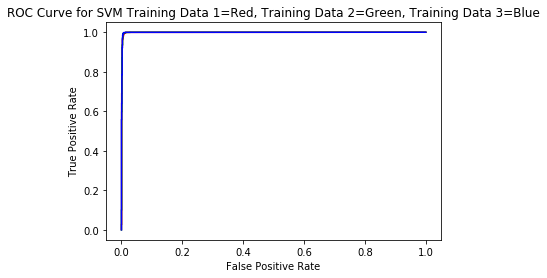

In [16]:
c_1=np.asarray(tpr_fpr(sequence_arr_1,thresh_matrix_1))
final_roc_mat_1=c_1.reshape((int(len(c_1)/2),2))

c_2=np.asarray(tpr_fpr(sequence_arr_2,thresh_matrix_2))
final_roc_mat_2=c_2.reshape((int(len(c_2)/2),2))

c_3=np.asarray(tpr_fpr(sequence_arr_3,thresh_matrix_3))
final_roc_mat_3=c_3.reshape((int(len(c_3)/2),2))


import matplotlib.pyplot as plt
plt.title('ROC Curve for SVM Training Data 1=Red, Training Data 2=Green, Training Data 3=Blue')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(final_roc_mat_1[:,1],final_roc_mat_1[:,0],'r')  
plt.plot(final_roc_mat_2[:,1],final_roc_mat_2[:,0],'g')  
plt.plot(final_roc_mat_3[:,1],final_roc_mat_3[:,0],'b')  
plt.show()

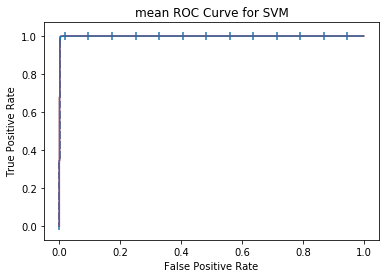

In [17]:
roc_matrix=(roc_matrix_1+roc_matrix_2+roc_matrix_3)/3
one_mat=[]
seven_mat=[]
for i in range(len(roc_matrix)):
  if (roc_matrix[i,0]==1):
    one_mat.append(roc_matrix[i,:])
  else:
    seven_mat.append(roc_matrix[i,:])
thresh_mat=np.unique(np.concatenate((np.asarray(one_mat)[:,-1],np.asarray(seven_mat)[:,-1]),axis=0))
thresh_matrix=np.sort(thresh_mat[::-1].T).reshape((len(thresh_mat),1))[::-1]
sequence_arr=np.concatenate((np.asarray(one_mat)[:,:],np.asarray(seven_mat)[:,:]),axis=0)
c=np.asarray(tpr_fpr(sequence_arr,thresh_matrix))
final_roc_mat=c.reshape((int(len(c)/2),2))
plt.title('mean ROC Curve for SVM')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(final_roc_mat[:,1],final_roc_mat[:,0],'r')   
plt.errorbar(final_roc_mat[:,1],final_roc_mat[:,0],yerr=0.02,errorevery=100) 
plt.show()

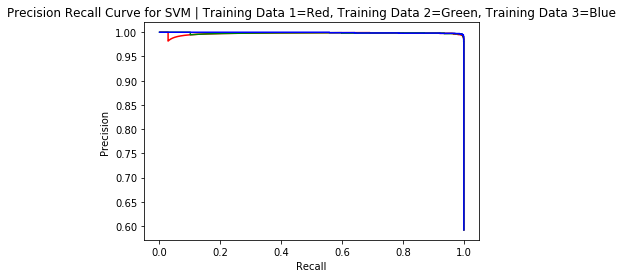

In [18]:
d_1=np.asarray(precision_recall(sequence_arr_1,thresh_matrix_1))
final_pr_mat_1=d_1.reshape((int(len(d_1)/2),2))

d_2=np.asarray(precision_recall(sequence_arr_2,thresh_matrix_2))
final_pr_mat_2=d_2.reshape((int(len(d_2)/2),2))

d_3=np.asarray(precision_recall(sequence_arr_3,thresh_matrix_3))
final_pr_mat_3=d_3.reshape((int(len(d_3)/2),2))

import matplotlib.pyplot as plt
plt.title('Precision Recall Curve for SVM | Training Data 1=Red, Training Data 2=Green, Training Data 3=Blue')
plt.ylabel('Precision ')
plt.xlabel('Recall')
plt.plot(final_pr_mat_1[:,1],final_pr_mat_1[:,0],'r')  
plt.plot(final_pr_mat_2[:,1],final_pr_mat_2[:,0],'g')  
plt.plot(final_pr_mat_3[:,1],final_pr_mat_3[:,0],'b')  
plt.show()

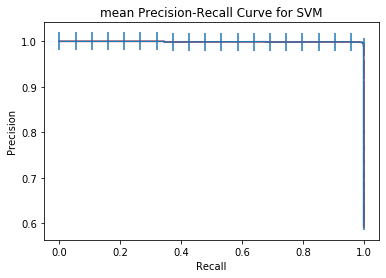

In [19]:
sequence_arr=np.concatenate((np.asarray(one_mat)[:,:],np.asarray(seven_mat)[:,:]),axis=0)
d=np.asarray(precision_recall(sequence_arr,thresh_matrix))
final_pr_mat=d.reshape((int(len(d)/2),2))
plt.title('mean Precision-Recall Curve for SVM')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.plot(final_pr_mat[:,1],final_pr_mat[:,0],'r') 
plt.errorbar(final_pr_mat[:,1],final_pr_mat[:,0],yerr=0.02,errorevery=100)   
plt.show()

#Neural Network

In [20]:
from sklearn.neural_network import MLPClassifier

clf_1 = MLPClassifier(alpha=0.0001,hidden_layer_sizes=(128,128,128,64,1), activation='relu',max_iter=200)
clf_1.fit(train_1[:,0:-1]/255.0,train_1[:,-1])
y_pred_nn_1=clf_1.predict(test[:,0:-1]/255.0)
y_pred_nn_1=y_pred_nn_1.reshape((len(y_pred_nn_1),1))
cm_nn_1=metrics.confusion_matrix(test[:,-1].astype(int),y_pred_nn_1)
pred_prob_nn_1=clf_1.predict_proba(test[:,0:-1]/255.0)[:,0]
cm_nn_1

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([[1876,    1],
       [  16, 1277]])

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([[1876,    1],
       [  16, 1277]])

In [28]:

clf_2 = MLPClassifier(alpha=0.0001,hidden_layer_sizes=(128,128,128,64,1), activation='relu',max_iter=200)
clf_2.fit(train_2[:,0:-1]/255.0,train_2[:,-1])
y_pred_nn_2=clf_2.predict(test[:,0:-1]/255.0)
y_pred_nn_2=y_pred_nn_2.reshape((len(y_pred_nn_2),1))
cm_nn_2=metrics.confusion_matrix(test[:,-1].astype(int),y_pred_nn_2)
pred_prob_nn_2=clf_2.predict_proba(test[:,0:-1]/255.0)[:,0]
cm_nn_2

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([[1876,    1],
       [  22, 1271]])

In [29]:
clf_3 = MLPClassifier(alpha=0.0001,hidden_layer_sizes=(128,128,128,64,1), activation='relu',max_iter=200)
clf_3.fit(train_3[:,0:-1]/255.0,train_3[:,-1])
y_pred_nn_3=clf_3.predict(test[:,0:-1]/255.0)
y_pred_nn_3=y_pred_nn_3.reshape((len(y_pred_nn_3),1))
cm_nn_3=metrics.confusion_matrix(test[:,-1].astype(int),y_pred_nn_3)
pred_prob_nn_3=clf_3.predict_proba(test[:,0:-1]/255.0)[:,0]
cm_nn_3

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([[1876,    1],
       [  17, 1276]])

In [30]:
#TESTING PERFORMANCE
#MEAN ACCURACY +- STANDARD DEVIATION
#Neural Network
conf_mat_nn_1=accuracy_deviation(cm_nn_1)
conf_mat_nn_2=accuracy_deviation(cm_nn_2)
conf_mat_nn_3=accuracy_deviation(cm_nn_3)
mean=(conf_mat_nn_1+conf_mat_nn_2+conf_mat_nn_3)/3
print('====================================================================================================')
print('\t\t Accuracy and Deviation for Training Data 1=',conf_mat_1,'% +',conf_mat_1-mean)
print('\t\t Accuracy and Deviation for Training Data  2=',conf_mat_2,'% +',conf_mat_2-mean)
print('\t\t Accuracy and Deviation for Training Data  3=',conf_mat_3,'% +',conf_mat_3-mean)
print('====================================================================================================')
print('\t\t\t\t Accuracy for Neural Network :', np.round(mean,2),'%')
print('====================================================================================================')

		 Accuracy and Deviation for Training Data 1= 98.9 % + -0.48666666666665037
		 Accuracy and Deviation for Training Data  2= 98.77 % + -0.61666666666666
		 Accuracy and Deviation for Training Data  3= 99.05 % + -0.3366666666666589
				 Accuracy for Neural Network : 99.39 %


In [0]:
#prediction Probability
pred_prob_nn_1=clf_1.predict_proba(test[:,0:-1]/255.0)[:,0]
pred_prob_nn_2=clf_2.predict_proba(test[:,0:-1]/255.0)[:,0]
pred_prob_nn_3=clf_3.predict_proba(test[:,0:-1]/255.0)[:,0]

roc_matrix_nn_1=np.concatenate((test[:,-1].astype(int).reshape((3170,1)),y_pred_nn_1.reshape((3170,1)),pred_prob_nn_1.reshape((3170,1))),axis=1)
roc_matrix_nn_2=np.concatenate((test[:,-1].astype(int).reshape((3170,1)),y_pred_nn_2.reshape((3170,1)),pred_prob_nn_2.reshape((3170,1))),axis=1)
roc_matrix_nn_3=np.concatenate((test[:,-1].astype(int).reshape((3170,1)),y_pred_nn_3.reshape((3170,1)),pred_prob_nn_3.reshape((3170,1))),axis=1)

one_mat_nn_1=[]
seven_mat_nn_1=[]
for i in range(len(roc_matrix_nn_1)):
  if (roc_matrix_nn_1[i,0]==1):
    one_mat_nn_1.append(roc_matrix_nn_1[i,:])
  else:
    seven_mat_nn_1.append(roc_matrix_nn_1[i,:])


one_mat_nn_2=[]
seven_mat_nn_2=[]
for i in range(len(roc_matrix_nn_2)):
  if (roc_matrix_nn_2[i,0]==1):
    one_mat_nn_2.append(roc_matrix_nn_2[i,:])
  else:
    seven_mat_nn_2.append(roc_matrix_nn_2[i,:])

one_mat_nn_3=[]
seven_mat_nn_3=[]
for i in range(len(roc_matrix_nn_3)):
  if (roc_matrix_nn_3[i,0]==1):
    one_mat_nn_3.append(roc_matrix_nn_3[i,:])
  else:
    seven_mat_nn_3.append(roc_matrix_nn_3[i,:])

thresh_mat_nn_1=np.unique(np.concatenate((np.asarray(one_mat_nn_1)[:,-1],np.asarray(seven_mat_nn_1)[:,-1]),axis=0))
thresh_matrix_nn_1=np.sort(thresh_mat_nn_1[::-1].T).reshape((len(thresh_mat_nn_1),1))[::-1]
sequence_arr_nn_1=np.concatenate((np.asarray(one_mat_nn_1)[:,:],np.asarray(seven_mat_nn_1)[:,:]),axis=0)


thresh_mat_nn_2=np.unique(np.concatenate((np.asarray(one_mat_nn_2)[:,-1],np.asarray(seven_mat_nn_2)[:,-1]),axis=0))
thresh_matrix_nn_2=np.sort(thresh_mat_nn_2[::-1].T).reshape((len(thresh_mat_nn_2),1))[::-1]
sequence_arr_nn_2=np.concatenate((np.asarray(one_mat_nn_2)[:,:],np.asarray(seven_mat_nn_2)[:,:]),axis=0)


thresh_mat_nn_3=np.unique(np.concatenate((np.asarray(one_mat_nn_3)[:,-1],np.asarray(seven_mat_nn_3)[:,-1]),axis=0))
thresh_matrix_nn_3=np.sort(thresh_mat_nn_3[::-1].T).reshape((len(thresh_mat_nn_3),1))[::-1]
sequence_arr_nn_3=np.concatenate((np.asarray(one_mat_nn_3)[:,:],np.asarray(seven_mat_nn_3)[:,:]),axis=0)


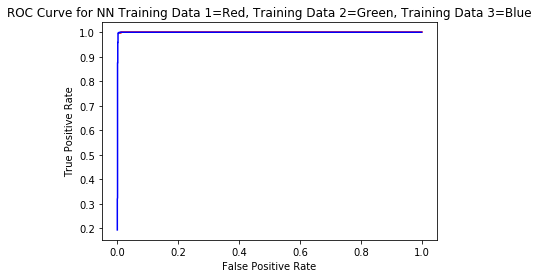

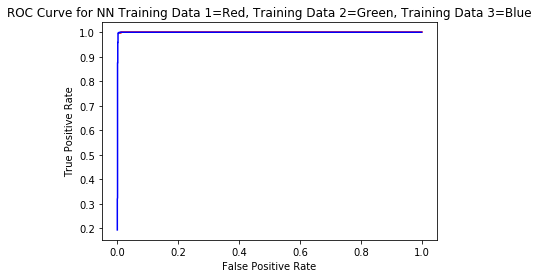

In [25]:
c_nn_1=np.asarray(tpr_fpr(sequence_arr_nn_1,thresh_matrix_nn_1))
final_roc_mat_nn_1=c_nn_1.reshape((int(len(c_nn_1)/2),2))

c_nn_2=np.asarray(tpr_fpr(sequence_arr_nn_2,thresh_matrix_nn_2))
final_roc_mat_nn_2=c_nn_2.reshape((int(len(c_nn_2)/2),2))

c_nn_3=np.asarray(tpr_fpr(sequence_arr_nn_3,thresh_matrix_nn_3))
final_roc_mat_nn_3=c_nn_3.reshape((int(len(c_nn_3)/2),2))


import matplotlib.pyplot as plt
plt.title('ROC Curve for NN Training Data 1=Red, Training Data 2=Green, Training Data 3=Blue')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(final_roc_mat_nn_1[:,1],final_roc_mat_nn_1[:,0],'r')  
plt.plot(final_roc_mat_nn_2[:,1],final_roc_mat_nn_2[:,0],'g')  
plt.plot(final_roc_mat_nn_3[:,1],final_roc_mat_nn_3[:,0],'b')  
plt.show()

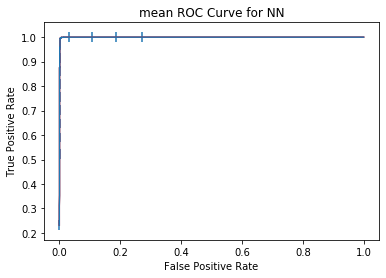

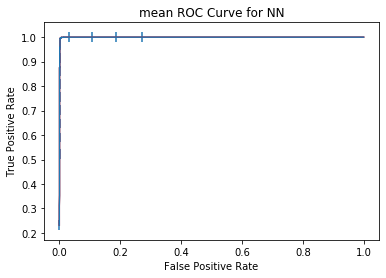

In [26]:
roc_matrix_nn=(roc_matrix_nn_1+roc_matrix_nn_2+roc_matrix_nn_3)/3
one_mat_nn=[]
seven_mat_nn=[]
for i in range(len(roc_matrix_nn)):
  if (roc_matrix_nn[i,0]==1):
    one_mat_nn.append(roc_matrix_nn[i,:])
  else:
    seven_mat_nn.append(roc_matrix_nn[i,:])
thresh_mat_nn=np.unique(np.concatenate((np.asarray(one_mat_nn)[:,-1],np.asarray(seven_mat_nn)[:,-1]),axis=0))
thresh_matrix_nn=np.sort(thresh_mat_nn[::-1].T).reshape((len(thresh_mat_nn),1))[::-1]
sequence_arr_nn=np.concatenate((np.asarray(one_mat_nn)[:,:],np.asarray(seven_mat_nn)[:,:]),axis=0)
c_nn=np.asarray(tpr_fpr(sequence_arr_nn,thresh_matrix_nn))
final_roc_mat_nn=c_nn.reshape((int(len(c_nn)/2),2))
plt.title('mean ROC Curve for NN')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(final_roc_mat_nn[:,1],final_roc_mat_nn[:,0],color='r') 
plt.errorbar(final_roc_mat_nn[:,1],final_roc_mat_nn[:,0],yerr=0.02,errorevery=100)  
plt.show()

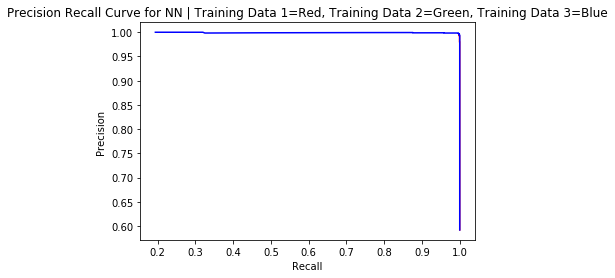

In [31]:
d_nn_1=np.asarray(precision_recall(sequence_arr_nn_1,thresh_matrix_nn_1))
final_pr_mat_nn_1=d_nn_1.reshape((int(len(d_nn_1)/2),2))

d_nn_2=np.asarray(precision_recall(sequence_arr_nn_2,thresh_matrix_nn_2))
final_pr_mat_nn_2=d_nn_2.reshape((int(len(d_nn_2)/2),2))

d_nn_3=np.asarray(precision_recall(sequence_arr_nn_3,thresh_matrix_nn_3))
final_pr_mat_nn_3=d_nn_3.reshape((int(len(d_nn_3)/2),2))

import matplotlib.pyplot as plt
plt.title('Precision Recall Curve for NN | Training Data 1=Red, Training Data 2=Green, Training Data 3=Blue')
plt.ylabel('Precision ')
plt.xlabel('Recall')
plt.plot(final_pr_mat_nn_1[:,1],final_pr_mat_nn_1[:,0],'r')  
plt.plot(final_pr_mat_nn_2[:,1],final_pr_mat_nn_2[:,0],'g')  
plt.plot(final_pr_mat_nn_3[:,1],final_pr_mat_nn_3[:,0],'b')  
plt.show()

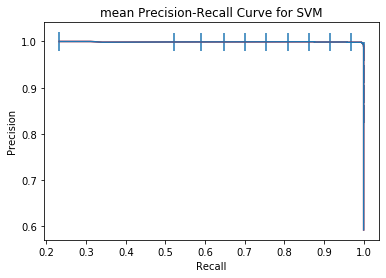

In [32]:
c_nn=np.asarray(precision_recall(sequence_arr_nn,thresh_matrix_nn))
final_pr_mat_nn=c_nn.reshape((int(len(c_nn)/2),2))
plt.title('mean Precision-Recall Curve for SVM')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.plot(final_pr_mat_nn[:,1],final_pr_mat_nn[:,0],'r')  
plt.errorbar(final_pr_mat_nn[:,1],final_pr_mat_nn[:,0],yerr=0.02,errorevery=100)   
plt.show()

#Equal Error Rate



In [0]:
def fpr_fnr(arr,thresh):
  x=[]
  for k in range(len(thresh)):
    t=thresh[k]
    tp=0
    fp=0
    tn=0
    fn=0
    for i in range(len(arr)):  
      if (arr[i,0]==1 and (arr[i,2]==t or arr[i,2]>t )):
        tp+=1
      elif (arr[i,0]==7 and (arr[i,2]>=t)):
        fp+=1
      elif (arr[i,0]==7 and arr[i,2]<t):
        tn+=1
      else :
        fn+=1
    x.append(fp/(tn+fp))
    x.append(fn/(tp+fn))
  return(x)


##SVM | Equal Error Rate

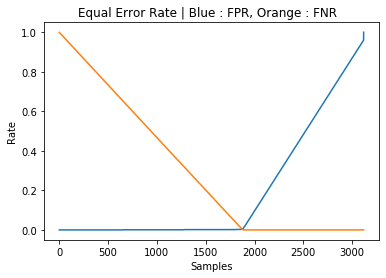

In [34]:
EER=np.asarray(fpr_fnr(sequence_arr,thresh_matrix))
plt.title("Equal Error Rate | Blue : FPR, Orange : FNR  ")
plt.xlabel('Samples')
plt.ylabel('Rate')
plt.plot(EER.reshape((int(len(EER)/2),2))[:,0])
plt.plot(EER.reshape((int(len(EER)/2),2))[:,1])
plt.show()

##Neural Network | Equal Error Rate

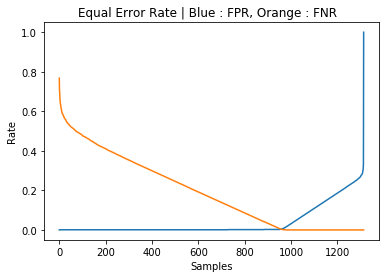

In [35]:
EER=np.asarray(fpr_fnr(sequence_arr_nn,thresh_matrix_nn))
plt.title("Equal Error Rate | Blue : FPR, Orange : FNR  ")
plt.xlabel('Samples')
plt.ylabel('Rate')
plt.plot(EER.reshape((int(len(EER)/2),2))[:,0])
plt.plot(EER.reshape((int(len(EER)/2),2))[:,1])
plt.show()